## 1、KNN介绍
上一篇我们讲过Kmeans，初学者常常把这两者搞混，虽然**KNN是有监督算法，Kmeans是无监督算法**，但KNN和Kmeans确实有相同之处：

- 两者都有“近朱者赤近墨者黑”的思想，**将距离近的样本点划为同一类别**；

虽然两者名称中都有“K”，但是：

- KNN中的K指的是**近邻个数**，也就是最近的K个点 ；
- Kmeans中的K指的是**最终聚类的个数**，也就是要将所有点分成K类。

## 2.K近邻算法步骤
K近邻算法的计算流程：
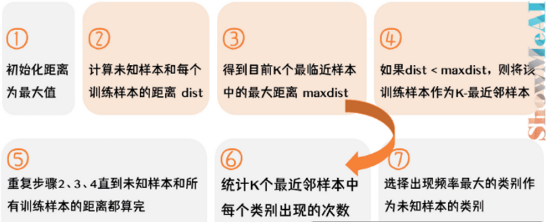

### 2.1、K近邻算法工作原理
- 存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每个数据与所属分类的对应关系。
- 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。
- **一般来说，只选择样本数据集中前 N个最相似的数据。K 一般不大于 20**，最后，选择 K个中出现次数最多的分类，作为新数据的分类。

### 2.2、K近邻算法参数选择
- **如何选择一个最佳的K值取决于数据**。一般情况下，在分类时较大的 K值能够减小噪声的影响，但会使类别之间的界限变得模糊。一个较好的K值能通过各种启发式技术（见超参数优化）来获取。
- 噪声和非相关性特征的存在，或特征尺度与它们的重要性不一致会使K近邻算法的准确性严重降低。对于选取和缩放特征来改善分类已经做了很多研究。一个普遍的做法是**利用进化算法优化功能扩展**，还有一种较普遍的方法是**利用训练样本的互信息进行选择特征**。
- 在二元（两类）分类问题中，选取K为奇数有助于避免两个分类平票的情形。在此问题下，选取最佳经验K值的方法是自助法。

说明： KNN 没有显示的训练过程，它是「懒惰学习」的代表，它在训练阶段只是把数据保存下来，训练时间开销为0，等收到测试样本后进行处理。

## 3.K近邻算法的缺点与改进
### 3.1、K近邻算法的优缺点
不同类别的样本点，分布在空间的不同区域。K近邻是基于空间距离较近的样本类别来进行分类，本质上是对于特征空间的划分。
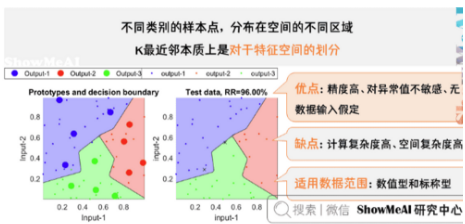

- **优点**：精度高、对异常值不敏感、无数据输入假定。
- **缺点**：计算复杂度高、空间复杂度高。
- **适用数据范围**：数值型和标称型。

### 3.2、K近邻算法的核心要素：距离度量准则
K**近邻算法依赖于空间中相近的点做类别判断，判断距离远近的度量标准非常重要**

距离的度量标准，对很多算法来说都是核心要素（比如无监督学习的 **[聚类算法]**也很大程度依赖距离度量），也对其结果有很大的影响。
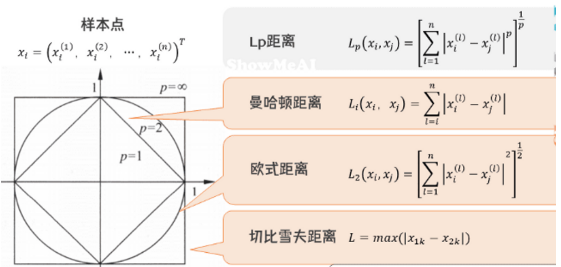

$Lp$**距离**（**又称闵可夫斯基距离，Minkowski Distance**）不是一种距离，而是**一组距离**的定义。

- 参数$p=1$时为**曼哈顿距离**（又称**L1距离**或**程式区块距离**），表示两个点在标准坐标系上的绝对轴距之和。
- 参数$p=2$时为**欧氏距离**（又称**L2距离**或**欧几里得度量**），是直线距离常见的两点之间或多点之间的距离表示法。
- 参数$p\to \infty$时，就是**切比雪夫距离**（各坐标数值差的最大值）。

### 3.3、K近邻算法的核心要素：K的大小
对于 KNN 算法而言，K的大小取值也至关重要，如果选择较小的K值，意味着整体模型变得复杂（模型容易发生过拟合），模型学习的近似误差（approximation error）会减小，但估计误差（estimation error）会增大。

如果选择较大的K值，就意味着整体的模型变得简单，减少学习的估计误差，但缺点是学习的近似误差会增大。

### 3.4、K近邻算法的缺点与改进
我们看到，对于样本 X，通过 KNN 算法，我们显然可以得到 X 应属于红色类别。但对于样本 Y，KNN 算法判定的结果是 Y应属于蓝色类别，然而从距离上看 

Y和红色的批次样本点更接近。因此，原始的 KNN 算法只考虑近邻不同类别的样本数量，而忽略掉了距离
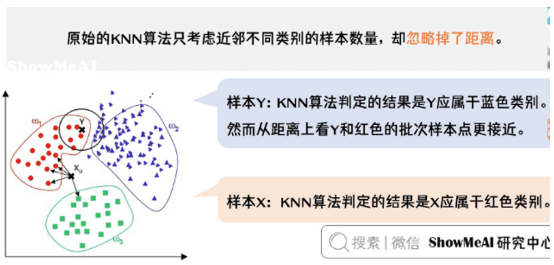

KNN 还存在如下缺点：

- **样本库容量依赖性较强对 KNN 算法在实际应用中的限制较大**：有不少类别无法提供足够的训练样本，使得 KNN 算法所需要的相对均匀的特征空间条件无法得到满足，使得识别的误差较大。
- K**值的确定**： KNN 算法必须指定 K值，K值选择不当则分类精度不能保证。

### 3.5、改进：
- 1、标准化 提升计算速度，标准差标准化：
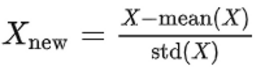

- 2、浓缩训练样本，从原始训练样本集中选择最优的参考子集进行K近邻寻找，从而减少训练样本的存储量和提高计算效率

## 代码实现：Iris分类-KNN
- sklearn


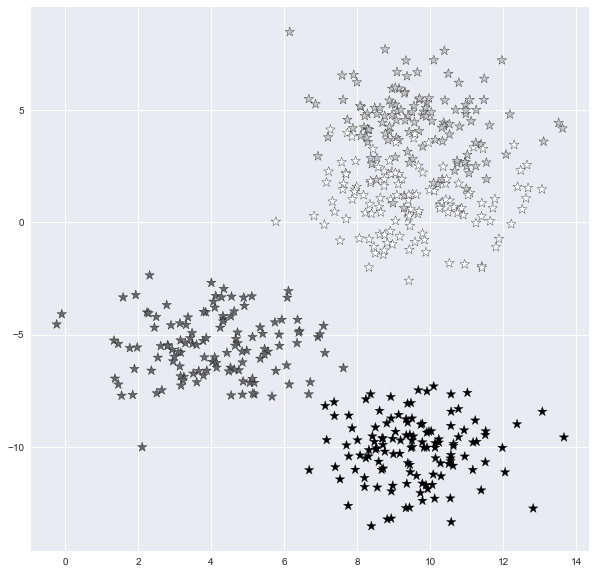

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()



Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


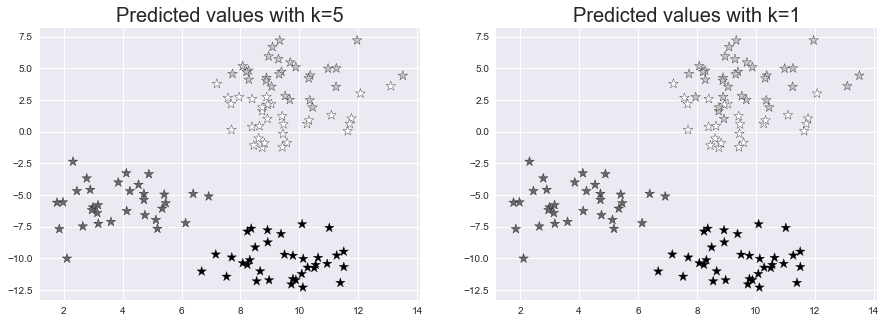

In [4]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)


print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
